In [157]:
import spekpy as sp
import matplotlib.pyplot as plt # Import pyplot for plotting

70 кВ 0.02 мм Al 6568.02 мкрГр
80 кВ 0.02 мм Al 6449.51 мкрГр
100 кВ 0.02 мм Al 6220.55 мкрГр
120 кВ 0.02 мм Al 6078.64 мкрГр
140 кВ 0.02 мм Al 6036.9 мкрГр


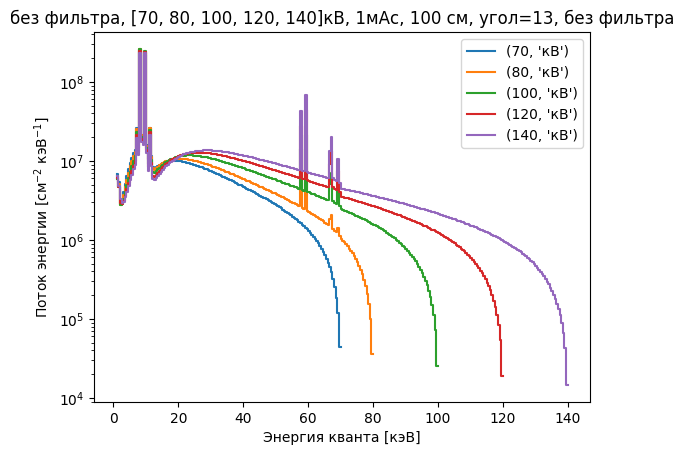

In [158]:
#mas можно задавать в функции, миллиампер-секунда
#Вольфрамовый анод, спектры в зависимости от напряжения
#1 мА*с, 100 см
#Варьируем напряжение на аноде без фильтра
s=sp.Spek (kvp=100, th=13, targ='W', z=100) #Расстояние в сантиметрах

for pot in [70, 80, 100, 120, 140]:
    s.set(kvp=pot)
    k, phi_k= s.get_spectrum (edges=True)
    plt.plot(k, phi_k, label=(pot, 'кВ'))
    hvl=s.get_hvl1() #Расчёт слоя половинного ослабления. По умолчанию - Алюминий
    kerm=s.get_kerma() # Поглощённая доза в воздухе?
    print (pot, "кВ", round (hvl,2), "мм Al", round (kerm,2), "мкрГр")
plt.xlabel('Энергия кванта [кэВ]')
plt.ylabel('Поток энергии [см$^{-2}$ кэВ$^{-1}$]')
plt.yscale('log')
plt.legend()
plt.title('без фильтра, [70, 80, 100, 120, 140]кВ, 1мАс, 100 см, угол=13, без фильтра')
plt.show()

70 кВ 3.82 мм Al 25.55 мкрГр
80 кВ 4.35 мм Al 35.56 мкрГр
100 кВ 5.38 мм Al 59.69 мкрГр
120 кВ 6.32 мм Al 88.26 мкрГр
140 кВ 7.17 мм Al 120.46 мкрГр


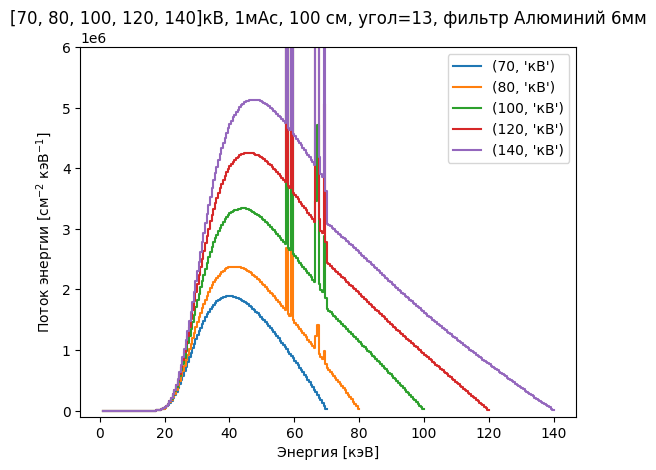

In [159]:
#Варьируем напряжение на аноде с фильтром
s=sp.Spek (kvp=100, th=13, targ='W', z=100) 
s.filter('Al',6) #Фильтр в миллиметрах

for pot in [70, 80, 100, 120, 140]:
    s.set(kvp=pot)
    k, phi_k= s.get_spectrum (edges=True)
    plt.plot(k, phi_k, label=(pot, 'кВ'))
    hvl=s.get_hvl1() #Расчёт слоя половинного ослабления
    kerm=s.get_kerma() # Поглощённая доза в воздухе?
    print (pot, "кВ", round (hvl,2), "мм Al", round (kerm,2), "мкрГр")
plt.xlabel('Энергия [кэВ]')
plt.ylabel('Поток энергии [см$^{-2}$ кэВ$^{-1}$]')
plt.legend()
plt.ylim(-1e5,6e6)
plt.title('[70, 80, 100, 120, 140]кВ, 1мАс, 100 см, угол=13, фильтр Алюминий 6мм')
plt.show()

100 кВ 2.02 мм Al 211.62 мкрГр
100 кВ 3.77 мм Al 106.26 мкрГр
100 кВ 4.92 мм Al 70.45 мкрГр
100 кВ 5.78 мм Al 51.39 мкрГр
100 кВ 6.46 мм Al 39.39 мкрГр


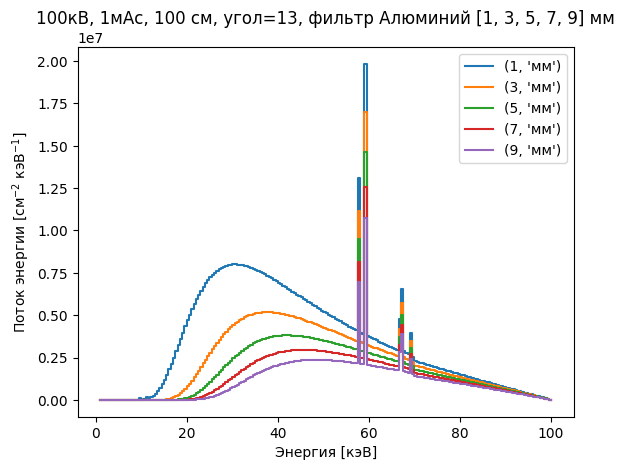

In [160]:
#Варьируем толщину фильтра из алюминия
s=sp.Spek (kvp=100, th=13, targ='W', z=100) 
i=0
pot=100
for filt in [1, 3, 5, 7, 9]: #Реальные значения толщины фильтров в мм, не аддитивно
    s.filter('Al',filt-i) #Фильтр в миллиметрах
    k, phi_k= s.get_spectrum (edges=True)
    plt.plot(k, phi_k, label=(filt, 'мм'))
    i=filt
    hvl=s.get_hvl1() #Расчёт слоя половинного ослабления
    kerm=s.get_kerma() # Поглощённая доза в воздухе?
    print (pot, "кВ", round (hvl,2), "мм Al", round (kerm,2), "мкрГр")
plt.xlabel('Энергия [кэВ]')
plt.ylabel('Поток энергии [см$^{-2}$ кэВ$^{-1}$]')
plt.legend()
plt.title('100кВ, 1мАс, 100 см, угол=13, фильтр Алюминий [1, 3, 5, 7, 9] мм')
plt.show()

100 кВ 7.31 мм Al 8.44 мкрГр
100 кВ 7.97 мм Al 3.43 мкрГр
100 кВ 8.51 мм Al 1.44 мкрГр
100 кВ 8.96 мм Al 0.62 мкрГр
100 кВ 9.34 мм Al 0.27 мкрГр


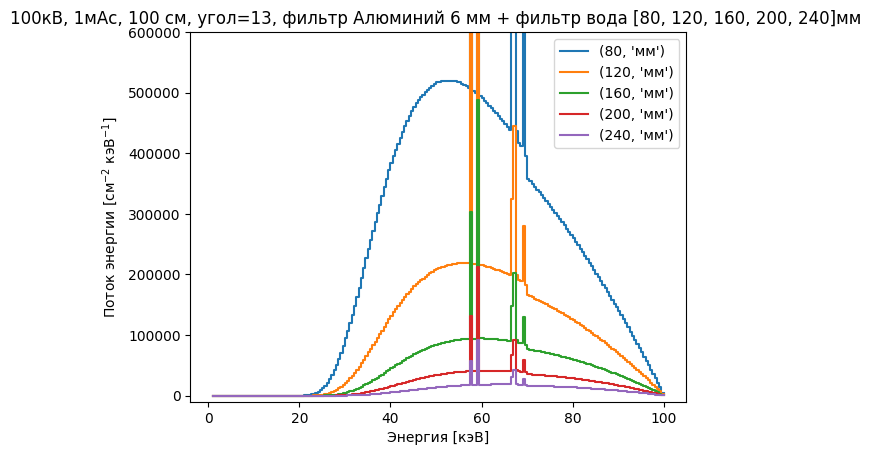

In [161]:
#Варьируем тощину слоя воды
s=sp.Spek (kvp=100, th=13, targ='W', z=100) 
s.filter('Al',6) #Фильтр в миллиметрах
i=0
pot=100
for water_thickness in [80, 120, 160, 200, 240]: #Указаны реальные значения толщины фильтров в мм, не аддитивно
    s.filter('water',water_thickness-i) #Фильтр в миллиметрах
    k, phi_k= s.get_spectrum (edges=True)
    plt.plot(k, phi_k, label=(water_thickness, 'мм'))
    i=water_thickness
    hvl=s.get_hvl1() #Расчёт слоя половинного ослабления
    kerm=s.get_kerma() # Поглощённая доза в воздухе?
    print (pot, "кВ", round (hvl,2), "мм Al", round (kerm,2), "мкрГр")
plt.xlabel('Энергия [кэВ]')
plt.ylabel('Поток энергии [см$^{-2}$ кэВ$^{-1}$]')
plt.legend()
plt.title('100кВ, 1мАс, 100 см, угол=13, фильтр Алюминий 6 мм + фильтр вода [80, 120, 160, 200, 240]мм ')
plt.ylim(-1e4,0.6e6)
plt.show()

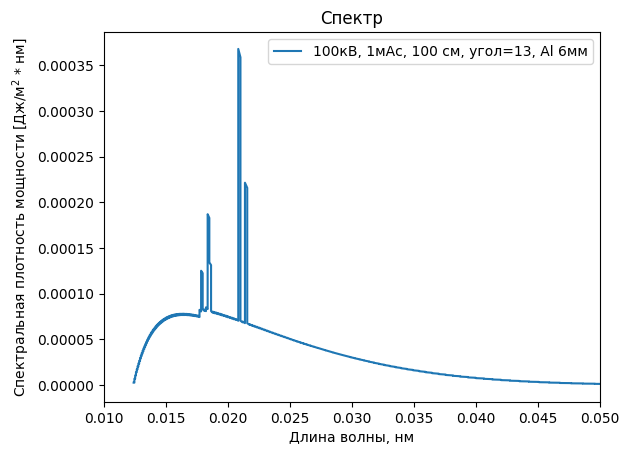

0.0123984 нм - минимальная длина волны излучения


In [162]:
import spekpy as sp
#Получаем спектр в Дж/(м^2*нм) от нм
import numpy as np
#По умолчанию график выводится для 1 мАс, т.е. столько то электронов пролетело, заряд которых 1 мАс. Поэтому энергия в Дж
#Исходные единицы измерения графика спектра N(E)/(S*E) От E , где E - энергия фотона, S - площадь, N(E) - количество фотонов энергией E) 
pot=100
s=sp.Spek (kvp=pot, th=13, targ='W', z=100) 
s.filter('Al',6) #Фильтр в миллиметрах
k, phi_k= s.get_spectrum (edges=True) #k - дискретный массив энергии фотонов E, phi_k  - N(E)/(S*E) 
wavelength = 1.23984/k  # λ(nm)= 1.23984 / E(кэВ), Делаем соответствие длины волны кванта и его энергии
dE_dlambda = -1.23984 / (wavelength ** 2)  # кэВ/нм, Вычисляем производную dE/dλ для преобразования  N'(λ)dλ=N'(E)dE . Исходим из того,
#Что площадь под графиком (общая энергия) одинакова. Т.е. интегралы равны.
photons_per_nm = phi_k * np.abs(dE_dlambda) # Преобразуем из N(E) в N(λ)
# 1 кэВ = 1.602 × 10⁻¹⁶ Дж  N(λ)*λ*e=энергия E(λ). Т.е. получим массив энергий для каждой длины волны
power_per_nm_per_m2 = photons_per_nm * k * 1.602e-16  # Дж/(м²·нм), преобразуем в спектральную плотность мощности. Т.е. массив количества фотонов умножаем на массив энергий
plt.plot(wavelength, power_per_nm_per_m2, label=('100кВ, 1мАс, 100 см, угол=13, Al 6мм'))
plt.xlabel('Длина волны, нм')
plt.ylabel('Спектральная плотность мощности [Дж/м$^{2}$ * нм]')
plt.title('Спектр')
plt.xlim(0.01,0.05)
plt.legend()
plt.show()
print (min(wavelength), "нм - минимальная длина волны излучения")
#Почему не Вт? Потому что на входе в этой библиотеке идёт известная порция "энергии" в виде мАс

In [163]:
#Считаем полную энергия для разных напряжений
import numpy as np #Тут считаем массивы
s=sp.Spek (kvp=10, th=13, targ='W', z=100) #Для фольфрама можем варьировать от 10 до 500 кВ
pot=10
pwr=[]
pot_range=[]
while pot<500:
    pot_range.append(pot)
    s.set(kvp=pot)
    pwr.append(s.get_eflu())
    pot=pot+10

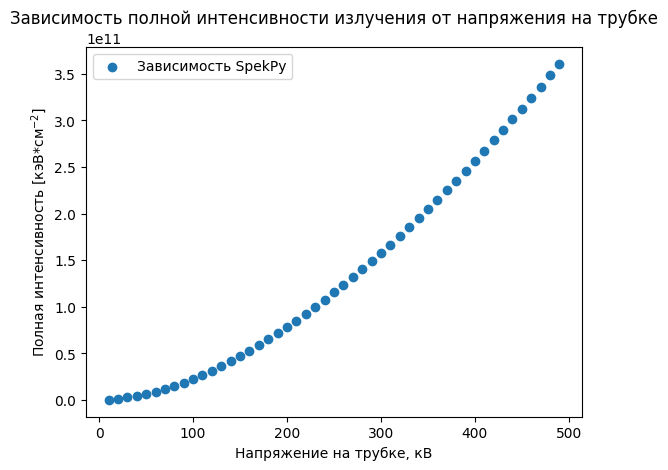

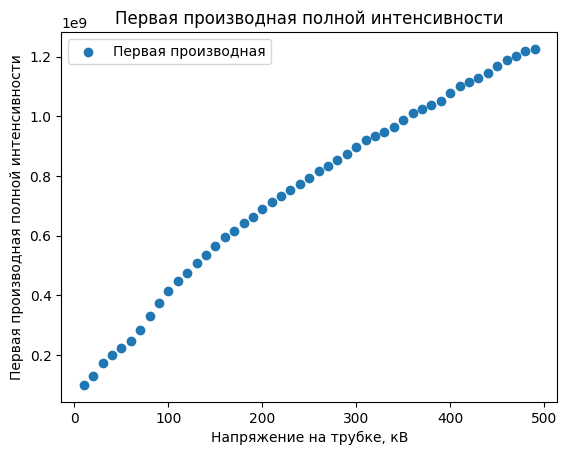

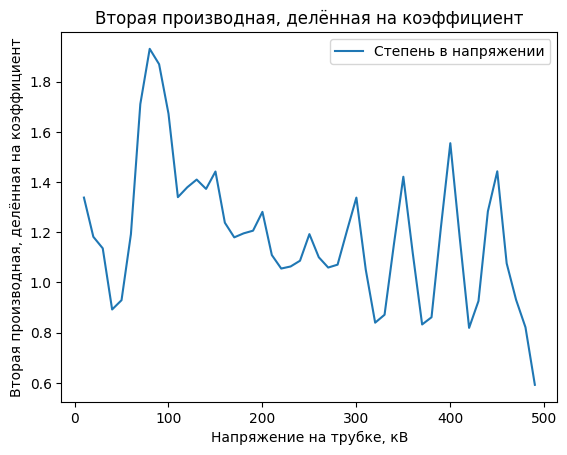

In [164]:
#Тут строим эти массивы
pwr_np=np.array(pwr)
pot_range_np=np.array(pot_range)
koef=pwr_np/(pot_range_np ** 2)
plt.scatter(pot_range_np, pwr_np, label=('Зависимость SpekPy'))
plt.xlabel('Напряжение на трубке, кВ')
plt.ylabel('Полная интенсивность [кэВ*см$^{-2}$]')
plt.title('Зависимость полной интенсивности излучения от напряжения на трубке')
plt.legend()
plt.show()
dydx=np.gradient(pwr_np, pot_range_np) #Считаем "производную"
plt.scatter(pot_range_np, dydx, label=('Первая производная'))
plt.xlabel('Напряжение на трубке, кВ')
plt.ylabel('Первая производная полной интенсивности')
plt.title('Первая производная полной интенсивности')
plt.legend()
plt.show()
dydx2=np.gradient(dydx, pot_range_np) #Считаем вторую"производную"
#разделим на koef пропорциональности
plt.plot(pot_range_np, dydx2/koef, label=('Степень в напряжении'))
plt.xlabel('Напряжение на трубке, кВ')
plt.ylabel('Вторая производная, делённая на коэффициент')
plt.title('Вторая производная, делённая на коэффициент')
plt.legend()
plt.show()

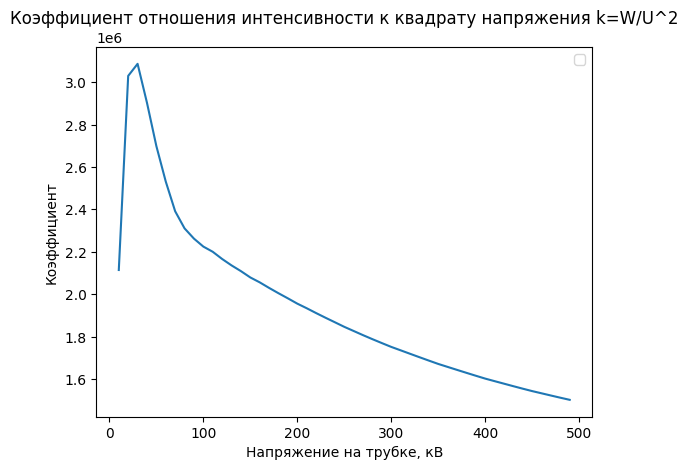

In [165]:
#Коэффициент k=W/U^2 зависит от напряжения
plt.plot(pot_range_np, koef)
plt.xlabel('Напряжение на трубке, кВ')
plt.ylabel('Коэффициент')
plt.title('Коэффициент отношения интенсивности к квадрату напряжения k=W/U^2') #Коэффициент зависит от напряжения
#Видимо, на больших напряжениях электроны проелтают глубже в анод и поэтому излучение больше рассеивается?
plt.legend()
plt.show()

In [166]:
#Считаем дозу, поглощённую в воде, в зависимости от анодного напряжения кВ
for pot in [70, 80, 100, 120, 140, 160, 180, 200]:
    s=sp.Spek (kvp=pot, th=13, targ='W', z=100) #Расстояние до детектора 100 см
    s.filter('Al',6) #Фильтр в миллиметрах
    kerm1=s.get_kerma()
    s.filter('water', 200) #Фильтр в миллиметрах
    kerm2=s.get_kerma()
    print (pot, "кВ", "6 мм Al", round (kerm1-kerm2,2), "поглощённая доза 200мм слоем воды, мкрГр")

70 кВ 6 мм Al 25.41 поглощённая доза 200мм слоем воды, мкрГр
80 кВ 6 мм Al 35.31 поглощённая доза 200мм слоем воды, мкрГр
100 кВ 6 мм Al 59.07 поглощённая доза 200мм слоем воды, мкрГр
120 кВ 6 мм Al 87.1 поглощённая доза 200мм слоем воды, мкрГр
140 кВ 6 мм Al 118.56 поглощённая доза 200мм слоем воды, мкрГр
160 кВ 6 мм Al 153.44 поглощённая доза 200мм слоем воды, мкрГр
180 кВ 6 мм Al 191.46 поглощённая доза 200мм слоем воды, мкрГр
200 кВ 6 мм Al 232.53 поглощённая доза 200мм слоем воды, мкрГр


In [167]:
#Считаем дозу, поглощённую в воде, в зависимости от толщины фильтра Al, U=100кВ
for filt in [1, 3, 5, 7, 9, 11, 13]: #Реальные значения толщины фильтров в мм
    s=sp.Spek (kvp=100, th=13, targ='W', z=100) #Расстояние до детектора 100 см
    s.filter('Al',filt) #Фильтр в миллиметрах
    kerm1=s.get_kerma()
    s.filter('water', 200) #Фильтр в миллиметрах
    kerm2=s.get_kerma()
    print ("100 кВ,", filt, "мм Al фильтр,", round (kerm1-kerm2,2), "мкрГр - поглощённая доза 200мм слоем воды")

100 кВ, 1 мм Al фильтр, 210.67 мкрГр - поглощённая доза 200мм слоем воды
100 кВ, 3 мм Al фильтр, 105.46 мкрГр - поглощённая доза 200мм слоем воды
100 кВ, 5 мм Al фильтр, 69.78 мкрГр - поглощённая доза 200мм слоем воды
100 кВ, 7 мм Al фильтр, 50.82 мкрГр - поглощённая доза 200мм слоем воды
100 кВ, 9 мм Al фильтр, 38.91 мкрГр - поглощённая доза 200мм слоем воды
100 кВ, 11 мм Al фильтр, 30.72 мкрГр - поглощённая доза 200мм слоем воды
100 кВ, 13 мм Al фильтр, 24.77 мкрГр - поглощённая доза 200мм слоем воды
